In [121]:
from typing import Dict 
from collections import defaultdict

def read_bits_from_go_test(filename: str) -> Dict[str, str]:
    bits = {}
    with open(filename, 'r') as f:
        for line in f:
            key, path = line.strip().split(',')
            bits[key.rstrip("\x00")] = path
    bits = {k: v for k, v in sorted(bits.items(), key=lambda item: item[1])}
    bits = {k: v for k, v in sorted(bits.items(), key=lambda item: len(item[1]))}
    return bits

def build_edges(prev_k, curr_k, rem_k, value, edge_map, edges, edges_label):
    if curr_k not in edge_map:
        edge_map[curr_k] = f"internal_{len(edge_map)}"
        edges.append((prev_k, curr_k))
        edges_label.append(curr_k[-1])

    if len(rem_k) == 0:
        edges.append((curr_k, value))
        edges_label.append('')
        return

    build_edges(curr_k, curr_k + rem_k[0], rem_k[1:], value, edge_map, edges, edges_label)

bits = read_bits_from_go_test("bits.csv")
edge_map = {}
edges = []
edges_label = []

for k, v in bits.items():
    print(k, v)
    build_edges("root", v[0], v[1:], k, edge_map, edges, edges_label)

print(edge_map)
print(edges)
print(edges_label)

G 0
I 01
F 10
H 10
B 0100
E 0100
A 1101
J 11010
D 110100
C 110100
{'0': 'internal_0', '01': 'internal_1', '1': 'internal_2', '10': 'internal_3', '010': 'internal_4', '0100': 'internal_5', '11': 'internal_6', '110': 'internal_7', '1101': 'internal_8', '11010': 'internal_9', '110100': 'internal_10'}
[('root', '0'), ('0', 'G'), ('0', '01'), ('01', 'I'), ('root', '1'), ('1', '10'), ('10', 'F'), ('10', 'H'), ('01', '010'), ('010', '0100'), ('0100', 'B'), ('0100', 'E'), ('1', '11'), ('11', '110'), ('110', '1101'), ('1101', 'A'), ('1101', '11010'), ('11010', 'J'), ('11010', '110100'), ('110100', 'D'), ('110100', 'C')]
['0', '', '1', '', '1', '0', '', '', '0', '0', '', '', '1', '0', '1', '', '0', '', '0', '', '']


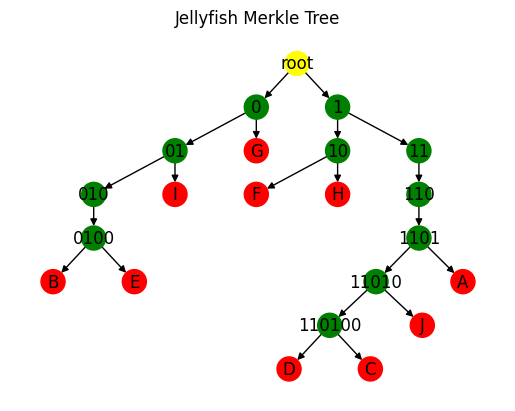

In [122]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt

G = nx.DiGraph()

color_map = ['yellow']
G.add_node('root')

for e in edge_map:
    G.add_node(e)
    color_map.append('green')

for k in bits:
    G.add_node(k)
    color_map.append('red')

for e in edges:
    G.add_edge(*e)

# same layout using matplotlib with labels
plt.title('Jellyfish Merkle Tree')
pos = graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True, node_color=color_map)